Theta: [[5.8391334 ]
 [4.61689972]]
Final Cost: 4.476971375977711


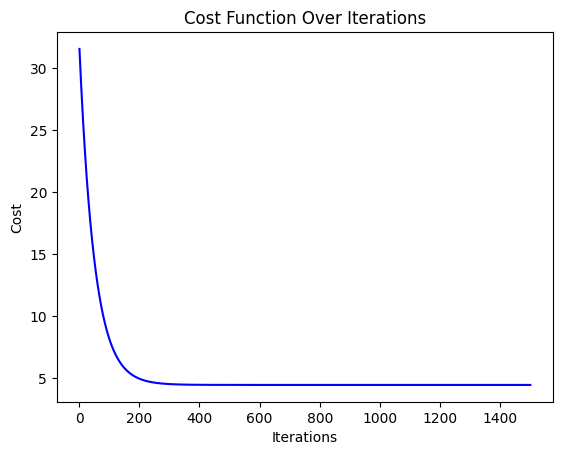

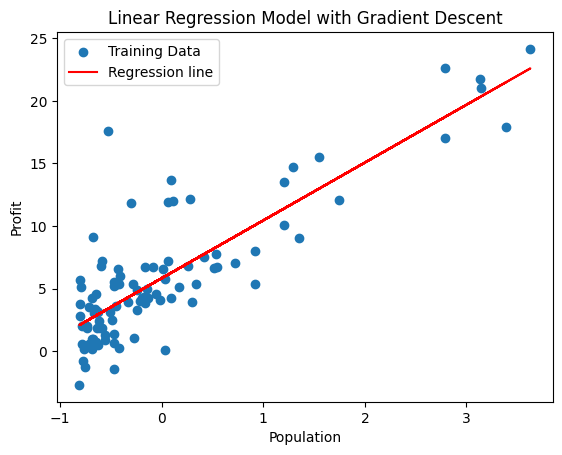

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/profit-_1_.csv', header=None, names=['Data'])
data[['Population', 'Profit']] = data['Data'].str.split(',', expand=True)
data['Population'] = pd.to_numeric(data['Population'])
data['Profit'] = pd.to_numeric(data['Profit'])

# Initialize parameters
theta = np.zeros((2, 1))  # Parameters for the linear regression model
iterations = 1500
alpha = 0.01

# Feature scaling (optional, but can be beneficial for gradient descent)
data['Population'] = (data['Population'] - data['Population'].mean()) / data['Population'].std()
data.insert(0, 'Ones', 1)

# Convert data to matrices
X = np.array(data[['Ones', 'Population']])
y = np.array(data['Profit']).reshape(-1, 1)

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(h - y))
    return cost

# Gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        h = X.dot(theta)
        errors = h - y
        theta = theta - (alpha / m) * X.T.dot(errors)
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Run gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Print final parameters and cost
print('Theta:', theta)
print('Final Cost:', cost_history[-1])

# Plot cost history
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

# Plot the regression line
plt.scatter(data['Population'], data['Profit'], label='Training Data')
plt.plot(data['Population'], X.dot(theta), color='red', label='Regression line')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Linear Regression Model with Gradient Descent')
plt.legend()
plt.show()
